In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.set_cmap(plt.cm.Paired)

<Figure size 432x288 with 0 Axes>

In [2]:
import numpy as np

from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=20,
                  n_features=2,
                  centers=2,
                  cluster_std=2,
                  random_state=3
                 )

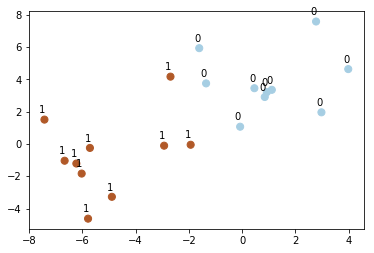

In [3]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50);

for l, dx, dy in zip(y, X[:, 0], X[:, 1]):
    plt.annotate(l, xy=(dx-0.2, dy+0.4))

In [4]:
def plotBoundary(X, clf, mesh=True, boundary=True, type='predict', clim=(None, None)):
    
    x_min = min(X[:, 0])
    x_max = max(X[:, 0])
    y_min = min(X[:, 1])
    y_max = max(X[:, 1])
    
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    
    if type == 'predict':
        Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])
    else:
        Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
    
    Z = Z.reshape(XX.shape)
    
    if mesh:
        if type == 'predict':
            plt.pcolormesh(XX, YY, Z, zorder=-10)
        else:
            if type == "probability":
                Z = 1 / (1 + np.exp(-Z))
            
            plt.pcolormesh(XX, YY, Z, zorder=-10, cmap=plt.cm.bwr)
            plt.colorbar()
            plt.clim(clim[0], clim[1])
    
    if boundary:
        level = [0]
        
        if type == "probability":
            level = [0.5]
        
        plt.contour(XX, YY, Z,
                   colors='k', linestyles='-', levels=level)
    
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

In [5]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\matplotlib\contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


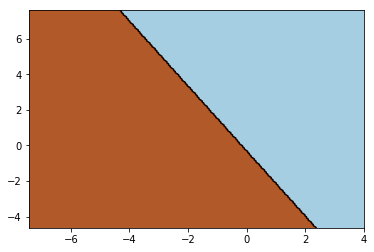

In [6]:
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y)

plotBoundary(X, clf)

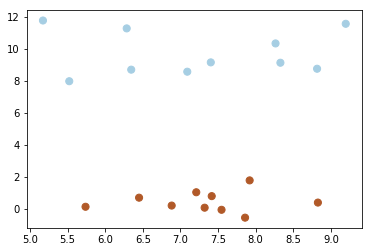

In [7]:
X, y = make_blobs(n_samples=20,
                  n_features=2,
                  centers=2,
                  cluster_std=1,
                  random_state=8
                 )

plt.scatter(X[:, 0], X[:, 1], c=y, s=50);

C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\matplotlib\contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


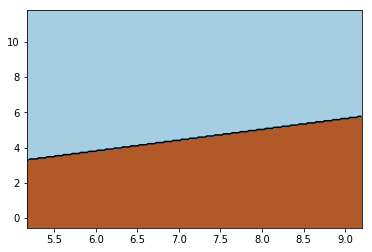

In [8]:
clf = LogisticRegression()

clf.fit(X, y)

plotBoundary(X, clf)

plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y)

C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\matplotlib\contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


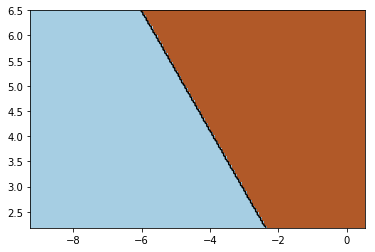

In [9]:
X, y = make_blobs(n_samples=20,
                  n_features=2,
                  centers=2,
                  cluster_std=1,
                  random_state=7
                 )

plt.scatter(X[:, 0], X[:, 1], c=y, s=50);

clf = LogisticRegression()

clf.fit(X, y)

plotBoundary(X, clf)

plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y)

C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\matplotlib\contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


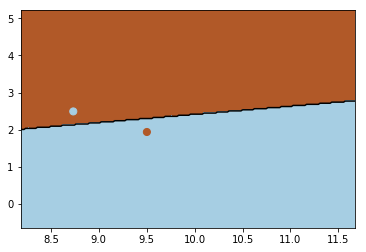

In [10]:
X, y = make_blobs(n_samples=20,
                  n_features=2,
                  centers=2,
                  cluster_std=1,
                  random_state=4
                 )

clf = LogisticRegression()

clf.fit(X, y)

plotBoundary(X, clf)

plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y)

In [11]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

X = data.data
y = data.target

In [12]:
from sklearn.model_selection import ShuffleSplit

ss = ShuffleSplit(n_splits=1,
                  train_size=0.8,
                  test_size=0.2,
                  random_state=0)

train_index, test_index = next(ss.split(X, y))

X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]

In [13]:
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.956140350877193

In [14]:
clf.C = 1e-3
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9385964912280702

In [15]:
clf

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [16]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
clf.predict(X_test)

C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1])

In [17]:
X_test_value = clf.decision_function(X_test)

In [18]:
X_test_value

array([ -4.83007723,   3.45754692,   6.1445382 ,   1.48242179,
         9.43507484,   5.82463539,   4.94119408,   6.40186196,
         3.31351132,   8.47151074,   0.45650378,   1.6708656 ,
         5.52606103,  -1.19834669,   1.39998257,  -4.70314046,
         4.18684333, -20.24665218,  -6.46286752, -26.66092633,
       -10.29040675,  -2.28968191,   6.3905846 ,   4.48774822,
        -4.93828737,   4.53385323,   6.255465  ,  -1.47438421,
         5.71444258, -23.99369358,   7.92196604, -17.77391127,
         0.57155704,  -7.50037755,   8.55381369,  -6.50785812,
         2.4813638 , -13.1672962 ,   5.4357903 ,  -7.95129944,
        -2.84056078,   5.43240565,  -6.16623931,   7.02424952,
        -2.60647658, -27.676311  ,   8.09602113,   3.52216071,
         6.71714171,  -7.9722097 , -12.46793066,  -0.64477437,
       -14.75086815,   5.43557899,   4.76735361,   6.96452666,
         4.20828748,   3.7434792 ,   4.05067368, -38.43900222,
        -4.1914057 ,  -9.84402525,   6.15064554,   5.33

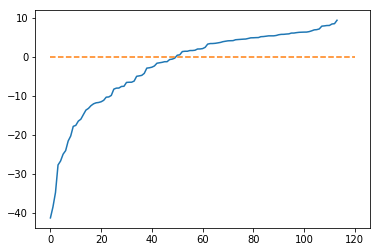

In [19]:
plt.plot(np.sort(X_test_value))
plt.plot([0, 120], [0, 0], linestyle='--')

(0, 1)

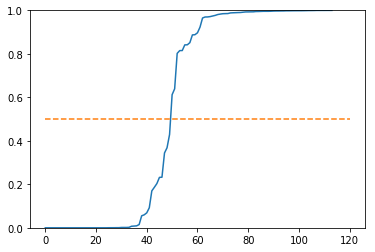

In [20]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

plt.plot(np.sort(sigmoid(X_test_value)))

plt.plot([0, 120], [0.5, 0.5], linestyle='--')
plt.ylim(0, 1)

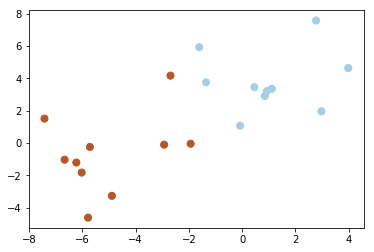

In [21]:
X, y = make_blobs(n_samples=20,
                  n_features=2,
                  centers=2,
                  cluster_std=2,
                  random_state=3
                 )

plt.scatter(X[:, 0], X[:, 1], c=y, s=50);

C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\matplotlib\contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


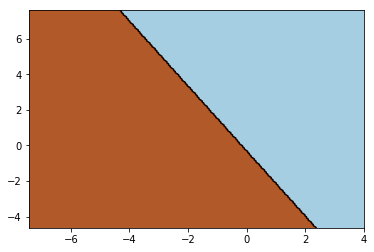

In [22]:
clf = LogisticRegression()

clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y)

plotBoundary(X, clf)

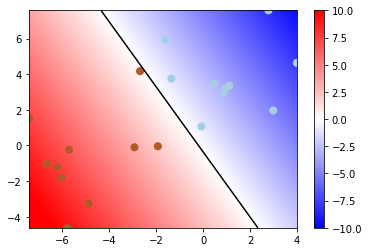

In [23]:
plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y)

plotBoundary(X, clf, type="value", clim=(-10, 10))

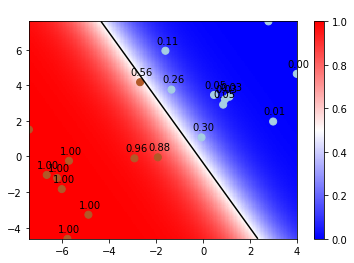

In [24]:
plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y)

plotBoundary(X, clf, type="probability", clim=(0, 1))

X_value = clf.decision_function(X)

for l, dx, dy in zip(X_value, X[:, 0], X[:, 1]):
    plt.annotate("{0:.2f}".format(sigmoid(l)), xy=(dx-0.4, dy+0.4))

C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


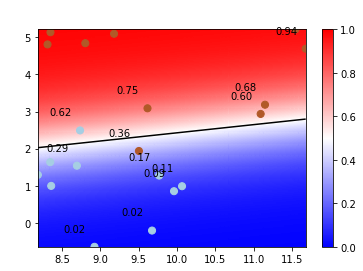

In [25]:
X, y = make_blobs(n_samples=20,
                  n_features=2,
                  centers=2,
                  cluster_std=1,
                  random_state=4
                 )

clf = LogisticRegression()

clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y)

X_value = clf.decision_function(X)

plotBoundary(X, clf, type="probability", clim=(0, 1))

for l, dx, dy in zip(X_value, X[:, 0], X[:, 1]):
    plt.annotate("{0:.2f}".format(sigmoid(l)), xy=(dx-0.4, dy+0.4))    